In [57]:
%pip install pandas numpy matplotlib scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, math, random, time


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
SENSOR_DATA = 'recordings/bling2.csv'
data = pd.read_csv(SENSOR_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
data['t'] = pd.to_datetime((data['time'] / 1_000_000_000.0), unit='s')
data.set_index(data['t'], inplace=True)
data

,time,gyro.x,gyro.y,gyro.z,accel.x,accel.y,accel.z,t
t,,,,,,,,
1970-01-01 00:00:00.775198,775198000,-0.005853,-0.021285,0.258075,-1.015141,-2.207454,9.423578,1970-01-01 00:00:00.775198
1970-01-01 00:00:00.786235,786235000,-0.000532,-0.022881,0.241579,-0.653617,-2.348712,9.464279,1970-01-01 00:00:00.786235
1970-01-01 00:00:00.796970,796970000,0.010642,-0.015963,0.123450,-0.620098,-2.224213,9.569624,1970-01-01 00:00:00.796970
1970-01-01 00:00:00.807794,807794000,0.009578,-0.019688,0.075560,-0.555455,-2.442086,9.753978,1970-01-01 00:00:00.807794
1970-01-01 00:00:00.816580,816580000,0.019156,-0.029266,0.001596,-0.725443,-2.183512,9.641450,1970-01-01 00:00:00.816580
...,...,...,...,...,...,...,...,...
1970-01-01 00:02:43.242139,163242139000,-0.284148,-0.975363,0.562975,-0.548272,8.743625,4.757279,1970-01-01 00:02:43.242139
1970-01-01 00:02:43.251514,163251514000,-0.251689,-0.893417,0.566168,-0.119710,8.511387,4.762067,1970-01-01 00:02:43.251514
1970-01-01 00:02:43.260882,163260882000,-0.204863,-0.800298,0.562975,0.119710,8.425196,4.766856,1970-01-01 00:02:43.260882


In [59]:
START = 4
STOP = 10
# START = 40.5
# STOP = 45
# START = 35
# STOP = 60 + 10

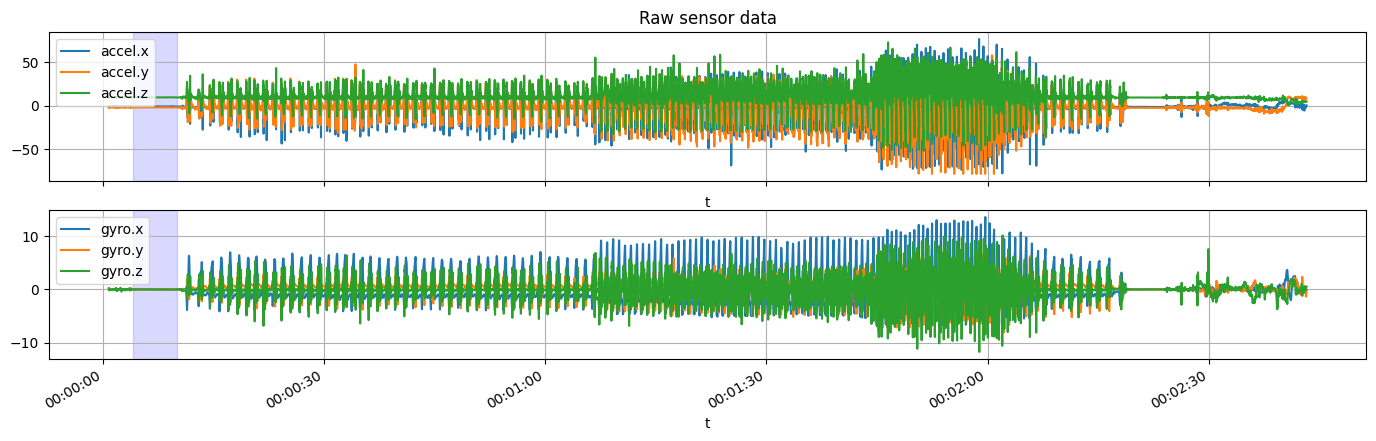

In [60]:
fig, (ax1, ax2) = plt.subplots(2, 1)

data['accel.x'].plot(ax=ax1)
data['accel.y'].plot(ax=ax1)
data['accel.z'].plot(ax=ax1)
ax1.xaxis.set_ticklabels([])
ax1.legend(loc='upper left')
ax1.grid()

data['gyro.x'].plot(ax=ax2)
data['gyro.y'].plot(ax=ax2)
data['gyro.z'].plot(ax=ax2)
ax2.legend(loc='upper left')
ax2.grid()

t_unit = 24*60*60
for ax in [ax1, ax2]:
    ax.axvspan(
        START / t_unit,
        STOP / t_unit,
        color='blue',
        alpha=0.15
    )

ax1.set_title('Raw sensor data')
fig.set_figwidth(17)

In [61]:
start_t = START * 1_000_000_000
stop_t = STOP * 1_000_000_000
sub_data = data[data['time'] > start_t][data['time'] < stop_t]

/tmp/ipykernel_31869/3440364403.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = data[data['time'] > start_t][data['time'] < stop_t]


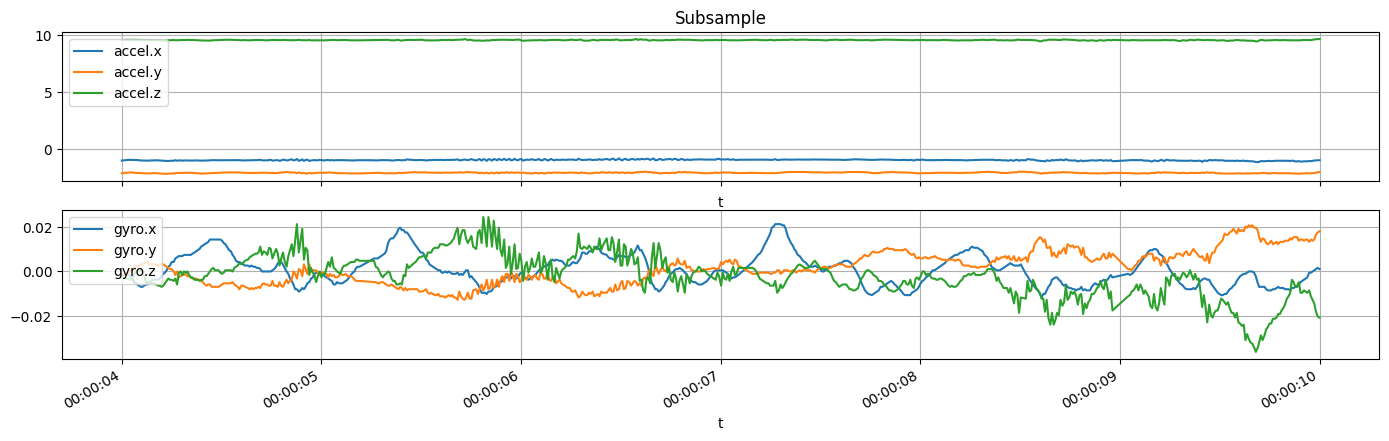

In [62]:
fig, (ax1, ax2) = plt.subplots(2, 1)

sub_data['accel.x'].plot(ax=ax1)
sub_data['accel.y'].plot(ax=ax1)
sub_data['accel.z'].plot(ax=ax1)
ax1.xaxis.set_ticklabels([])
ax1.legend(loc='upper left')
ax1.grid()

sub_data['gyro.x'].plot(ax=ax2)
sub_data['gyro.y'].plot(ax=ax2)
sub_data['gyro.z'].plot(ax=ax2)
ax2.legend(loc='upper left')
ax2.grid()

ax1.set_title('Subsample')
fig.set_figwidth(17)

In [63]:
SUBSAMPLE_DATA = SENSOR_DATA.replace('.csv', '_supsample.csv')
if SUBSAMPLE_DATA == SENSOR_DATA:
    raise Exception('About to override sensor data recording')
out = sub_data.drop(columns=['t']).reset_index().drop(columns=['t']).set_index('time')
out.to_csv(SUBSAMPLE_DATA)